In [1]:
import pandas as pd

citibike_data = None

for month in range(1,13):
    if month < 10:
        month_str = f'0{month}'
    else:
        month_str = f'{month}'
    print('Loading month', month_str)
    current_month = pd.read_csv(f'../dataset/2018{month_str}-citibike-tripdata.csv')
        
    if citibike_data is None:
        citibike_data = current_month
    else:
        citibike_data = citibike_data.append(current_month)

Loading month 01
Loading month 02
Loading month 03
Loading month 04
Loading month 05
Loading month 06
Loading month 07
Loading month 08
Loading month 09
Loading month 10
Loading month 11
Loading month 12


In [2]:
citibike_data = citibike_data.dropna()

import numpy as np

citibike_data['starttime'] = pd.to_datetime(citibike_data['starttime'])
citibike_data['stoptime'] = pd.to_datetime(citibike_data['stoptime'])

citibike_data['tripduration'] = (citibike_data['stoptime'] - citibike_data['starttime']).dt.total_seconds().apply(np.floor).astype(int)

filter_columns = [
    'tripduration', 
    'starttime', 
    'stoptime', 
    'start station id',
    'start station latitude',
    'start station longitude',
    'end station id',
    'end station latitude',
    'end station longitude',
    'usertype',
    'birth year'
]
citibike_data = citibike_data[filter_columns]
citibike_data = citibike_data[citibike_data['tripduration'] <= 20*24*60*60]

citibike_data = citibike_data[citibike_data['end station latitude'] <= 41.13]
citibike_data = citibike_data[citibike_data['start station latitude'] <= 41.13]
citibike_data = citibike_data[citibike_data['end station latitude'] >= 40.12]
citibike_data = citibike_data[citibike_data['start station latitude'] >= 40.12]
citibike_data = citibike_data[citibike_data['end station longitude'] >= -74.40]
citibike_data = citibike_data[citibike_data['start station longitude'] >= -74.40]
citibike_data = citibike_data[citibike_data['end station longitude'] <= -73.19]
citibike_data = citibike_data[citibike_data['start station longitude'] <= -73.19]

citibike_data['start_weekday'] = citibike_data['starttime'].dt.day_name()

citibike_data

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,birth year,start_weekday
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,Subscriber,1992,Monday
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,Subscriber,1969,Monday
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,Subscriber,1956,Monday
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,Subscriber,1974,Monday
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,Subscriber,1992,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
1016500,734,2018-12-31 23:55:06.991,2019-01-01 00:07:21.230,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,Subscriber,1986,Monday
1016501,2551,2018-12-31 23:55:44.307,2019-01-01 00:38:15.782,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,Customer,1969,Monday
1016502,2376,2018-12-31 23:56:52.850,2019-01-01 00:36:29.286,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,Subscriber,1979,Monday
1016503,2758,2018-12-31 23:58:29.212,2019-01-01 00:44:27.517,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,Customer,1969,Monday


In [3]:
features_df = citibike_data
feature_columns = [
    'tripduration', 
    'start station latitude',
    'start station longitude',
    'end station latitude',
    'end station longitude',
    'birth year',
    'start_weekday'
]
label_column = 'usertype'

features_df = features_df[feature_columns + [label_column]]
features_df

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,start_weekday,usertype
0,970,40.767272,-73.993929,40.749013,-73.988484,1992,Monday,Subscriber
1,723,40.767272,-73.993929,40.750585,-73.994685,1969,Monday,Subscriber
2,496,40.767272,-73.993929,40.755942,-74.002116,1956,Monday,Subscriber
3,306,40.767272,-73.993929,40.763707,-73.985162,1974,Monday,Subscriber
4,306,40.767272,-73.993929,40.774667,-73.984706,1992,Monday,Subscriber
...,...,...,...,...,...,...,...,...
1016500,734,40.730477,-73.999061,40.749156,-73.991600,1986,Monday,Subscriber
1016501,2551,40.794067,-73.962868,40.765909,-73.976342,1969,Monday,Customer
1016502,2376,40.701907,-74.013942,40.701221,-74.012342,1979,Monday,Subscriber
1016503,2758,40.794067,-73.962868,40.764397,-73.973715,1969,Monday,Customer


In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [5]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

from sklearn import preprocessing

userttype_unique = features_df[label_column].unique()
le_pp = preprocessing.LabelEncoder()
le_pp.fit(userttype_unique)
usertype_encoded = le_pp.transform(features_df[label_column])
one_hot_encoded_usertype = to_categorical(usertype_encoded)
one_hot_encoded_usertype

Using TensorFlow backend.


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [6]:
features_df['start_weekday_str'] = features_df['start_weekday']
weekday_unique = features_df['start_weekday'].unique()

convert_weekdays = {
    'start_weekday': {
        'Monday': 0, 
        'Tuesday': 1, 
        'Wednesday': 2, 
        'Thursday': 3, 
        'Friday': 4, 
        'Saturday': 5, 
        'Sunday': 6}
}

features_df = features_df.replace(convert_weekdays)
features_df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,start_weekday,usertype,start_weekday_str
0,970,40.767272,-73.993929,40.749013,-73.988484,1992,0,Subscriber,Monday
1,723,40.767272,-73.993929,40.750585,-73.994685,1969,0,Subscriber,Monday
2,496,40.767272,-73.993929,40.755942,-74.002116,1956,0,Subscriber,Monday
3,306,40.767272,-73.993929,40.763707,-73.985162,1974,0,Subscriber,Monday
4,306,40.767272,-73.993929,40.774667,-73.984706,1992,0,Subscriber,Monday
...,...,...,...,...,...,...,...,...,...
1016500,734,40.730477,-73.999061,40.749156,-73.991600,1986,0,Subscriber,Monday
1016501,2551,40.794067,-73.962868,40.765909,-73.976342,1969,0,Customer,Monday
1016502,2376,40.701907,-74.013942,40.701221,-74.012342,1979,0,Subscriber,Monday
1016503,2758,40.794067,-73.962868,40.764397,-73.973715,1969,0,Customer,Monday


In [7]:
features_df = features_df.drop(['start_weekday_str'], axis=1)

In [8]:
usertype_one_hot = label_column + '_one_hot'
features_df[usertype_one_hot] = list(one_hot_encoded_usertype)
features_df

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,start_weekday,usertype,usertype_one_hot
0,970,40.767272,-73.993929,40.749013,-73.988484,1992,0,Subscriber,"[0.0, 1.0]"
1,723,40.767272,-73.993929,40.750585,-73.994685,1969,0,Subscriber,"[0.0, 1.0]"
2,496,40.767272,-73.993929,40.755942,-74.002116,1956,0,Subscriber,"[0.0, 1.0]"
3,306,40.767272,-73.993929,40.763707,-73.985162,1974,0,Subscriber,"[0.0, 1.0]"
4,306,40.767272,-73.993929,40.774667,-73.984706,1992,0,Subscriber,"[0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...
1016500,734,40.730477,-73.999061,40.749156,-73.991600,1986,0,Subscriber,"[0.0, 1.0]"
1016501,2551,40.794067,-73.962868,40.765909,-73.976342,1969,0,Customer,"[1.0, 0.0]"
1016502,2376,40.701907,-74.013942,40.701221,-74.012342,1979,0,Subscriber,"[0.0, 1.0]"
1016503,2758,40.794067,-73.962868,40.764397,-73.973715,1969,0,Customer,"[1.0, 0.0]"


In [9]:
small_subset = features_df

In [10]:
small_subset.groupby(label_column).size()

usertype
Customer       1932250
Subscriber    15613220
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    small_subset,
    test_size=0.33, 
    random_state=42, 
    stratify=small_subset[label_column]
)

10460857 1294607
Random under-sampling:
usertype
Customer      1294607
Subscriber    1294607
dtype: int64


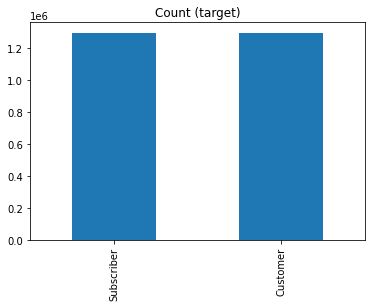

In [12]:
count_class_0, count_class_1 = train_set[label_column].value_counts()
print(count_class_0, count_class_1)
# Divide by class
df_class_0 = train_set[train_set[label_column] == 'Subscriber']
df_class_1 = train_set[train_set[label_column] == 'Customer']

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.groupby(label_column).size())

df_test_under[label_column].value_counts().plot(kind='bar', title='Count (target)');

In [13]:
train_set = df_test_under
train_set

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,start_weekday,usertype,usertype_one_hot
979836,825,40.750200,-73.990931,40.747804,-73.973442,1974,3,Subscriber,"[0.0, 1.0]"
1864533,487,40.764700,-73.924031,40.756913,-73.921631,1981,1,Subscriber,"[0.0, 1.0]"
1007365,767,40.709056,-74.010434,40.739448,-74.005070,1980,0,Subscriber,"[0.0, 1.0]"
135814,2458,40.703554,-74.006702,40.765005,-73.958185,1962,4,Subscriber,"[0.0, 1.0]"
1926432,776,40.746524,-73.977885,40.739355,-73.999318,1972,4,Subscriber,"[0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...
906304,2439,40.750200,-73.990931,40.786795,-73.977112,1969,5,Customer,"[1.0, 0.0]"
948469,1670,40.769155,-73.981918,40.778131,-73.960694,1969,1,Customer,"[1.0, 0.0]"
845132,1329,40.750200,-73.990931,40.734232,-73.986923,1969,0,Customer,"[1.0, 0.0]"
485628,1191,40.714948,-74.002345,40.730207,-73.991026,1969,3,Customer,"[1.0, 0.0]"


In [14]:
from keras import Model
from keras.layers import concatenate, Dense, Input


input_layer = Input(shape=(7,))

hidden_1 = Dense(50)(input_layer)
hidden_2 = Dense(20)(hidden_1)

classification = Dense(2, activation='softmax')(hidden_2)

model = Model(inputs=[input_layer], outputs=[classification])

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 1,462
Trainable params: 1,462
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)]

train_set_labels = np.array(train_set['usertype_one_hot'].tolist())

model.fit(
    train_set[feature_columns].values, 
    train_set_labels, 
    batch_size=128, 
    epochs=10, 
    validation_split=0.3, 
    callbacks=callbacks
)

Train on 1812449 samples, validate on 776765 samples
Epoch 1/10
1812449/1812449 [==============================] - 20s 11us/step - loss: 7.8476 - accuracy: 0.6845 - val_loss: 27.7386 - val_accuracy: 0.4420
Epoch 2/10
1812449/1812449 [==============================] - 20s 11us/step - loss: 1.2781 - accuracy: 0.7255 - val_loss: 1.3493 - val_accuracy: 0.1592
Epoch 3/10
1812449/1812449 [==============================] - 20s 11us/step - loss: 0.5723 - accuracy: 0.7407 - val_loss: 0.9067 - val_accuracy: 0.2962
Epoch 4/10
1812449/1812449 [==============================] - 20s 11us/step - loss: 0.5610 - accuracy: 0.7459 - val_loss: 1.0076 - val_accuracy: 0.2078
Epoch 5/10
1812449/1812449 [==============================] - 20s 11us/step - loss: 0.5520 - accuracy: 0.7467 - val_loss: 0.9429 - val_accuracy: 0.3437
Epoch 6/10
1812449/1812449 [==============================] - 20s 11us/step - loss: 0.5478 - accuracy: 0.7467 - val_loss: 1.1084 - val_accuracy: 0.2698


In [17]:
test_set_labels = np.array(test_set[usertype_one_hot].tolist())
model.evaluate([test_set[feature_columns]], test_set_labels, batch_size=128)

5790006/5790006 [==============================] - 22s 4us/step


[0.39857418300357134, 0.8724389672279358]

In [39]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_set[feature_columns])

print(len(test_set_labels))
print(y_pred)

y_true = [np.argmax(y, axis=None, out=None) for y in test_set_labels]
y_pred = [np.argmax(y, axis=None, out=None) for y in y_pred]

print(classification_report(y_true, y_pred))

5790006
[[0.0820525  0.9179475 ]
 [0.25576285 0.7442371 ]
 [0.18798989 0.81201005]
 ...
 [0.20249636 0.7975037 ]
 [0.6610407  0.33895934]
 [0.19253783 0.80746216]]
              precision    recall  f1-score   support

           0       0.39      0.27      0.32    637643
           1       0.91      0.95      0.93   5152363

    accuracy                           0.87   5790006
   macro avg       0.65      0.61      0.62   5790006
weighted avg       0.86      0.87      0.86   5790006



In [22]:
print(len(train_set_labels))
print(len(train_set[feature_columns].values))

2589214
2589214
